<center>

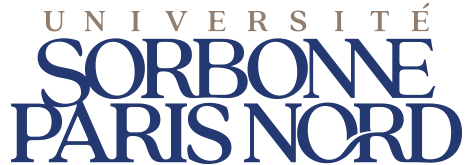

</center>

<h1><center><strong style="color: #293358">NoSQL<br/> BUT 3 - IUT Villetaneuse <br/> Introduction à MongoDB</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@sorbonne-paris-nord.fr</email>
<br/>
Year 2025-2026

Original Content

Licenced under Affero GNU3
</center>

## <strong style="color: #8b7d6d">Usage de la machine virtuelle</strong>

1. Téléchargez la VM ici : https://e.pcloud.link/publink/show?code=XZ3dvxZh0fEzIaCmqF9HHRP346u0S0MY4lk
2. Importez la dans Virtual Box
3. Connectez-vous avec l'id `uspn`et le mot de passe `uspn`
4. Enjoy !


Cette machine virtuelle est déjà configurée pour Redis et il vous suffit de lancer les quelques commandes de la section suivante pour y installer MongoDB.

## <strong style="color: #8b7d6d">Installation de mongodb</strong>

### Ubuntu 24.04 LTS

L'installation de mongodb, de pymongo et de mongo compass est déjà faite dans la VM 😉

À toute fin utile, voici les commandes pour l'installation sous Ubuntu :

In [ ]:
! sudo apt update ; sudo apt-get install gnupg curl
! curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg --dearmor
! echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu noble/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list
! sudo apt update ; sudo apt-get install -y mongodb-org wget

In [ ]:
! pip install pymongo pandas --break-system-packages

In [ ]:
! wget https://downloads.mongodb.com/compass/mongodb-compass_1.44.4_amd64.deb
! sudo apt install ./mongodb-compass_1.44.4_amd64.deb

In [ ]:
! wget https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json

### Windows / MacOS

1. Téléchargez MongoDB Community Edition : https://www.mongodb.com/try/download/community
2. Installez le en mettant tout par défaut
3. Téléchargez Mongo Compass : https://www.mongodb.com/products/tools/compass 
4. Installez le.
5. Installez `pandas`, `pymongo` et `wget` : 

In [ ]:
! pip install pymongo pandas wget

6. Téléchargez la base des pokemons : 

In [ ]:
import wget
url = "https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json"
wget.download(url)

## <strong style="color: #8b7d6d">Lancement du service Mongodb (`mongod`)</strong>

### Ubuntu 24.04 LTS

In [ ]:
! sudo service mongod start
! sudo service mongod status

### Windows 10 / 11

Lancez une invite de commande (ou un Windows Terminal) en administrateur, puis exécutez :

```sh
net start MongoDB
```

# <strong style="color: #8b7d6d">CRUD (Create Read Update Delete) en MongoDB</strong>

In [1]:
import pymongo, json
import pandas as pd

#### 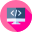 **TODO!**

Ouvrez le fichier JSON dans Pandas et affichez le en format String.

💡Astuce :
- Voici une introduction officielle de 10 minutes pour Pandas : https://pandas.pydata.org/docs/user_guide/10min.html 

In [2]:
# code moi steupléé 🥺
import numpy as np

with open("pokemons.json") as f:
    pokemons = json.load(f)


df = pd.DataFrame.from_records(pokemons)
df = df.replace(np.nan, None)
print(df.to_string())

     Number         Name    Type_1    Type_2  Total   HP  Attack  Defense  Sp_Atk  Sp_Def  Speed  Generation  isLegendary   Color  hasGender Pr_Male   Egg_Group_1 Egg_Group_2  hasMegaEvolution  Height_m  Weight_kg  Catch_Rate        Body_Style
0         1    Bulbasaur     Grass    Poison    318   45      49       49      65      65     45           1        False   Green       True   0.875       Monster       Grass             False      0.71        6.9          45         quadruped
1         2      Ivysaur     Grass    Poison    405   60      62       63      80      80     60           1        False   Green       True   0.875       Monster       Grass             False      0.99       13.0          45         quadruped
2         3     Venusaur     Grass    Poison    525   80      82       83     100     100     80           1        False   Green       True   0.875       Monster       Grass              True      2.01      100.0          45         quadruped
3         4   Charmander

#### 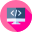 **TODO!**

Affichez le dataframe réorienté en "records", donc avec une orientation par rangées de la table

In [3]:
# code moi steupléé 🥺

pokemons = df.to_dict(orient="records")

#### 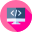 **TODO!**

Connectez votre client mongodb à votre service mongodb en localhost. Puis créez la base de données `but3` et sa collection `pokemons`.

💡 Astuces :
- La documentation de pymongo : https://pymongo.readthedocs.io/en/stable/genindex.html

In [7]:
# code moi steupléé 🥺

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

# creation de la base de données
but3db = myclient["but3"]

# creation de la collection
pokemons_coll = but3db["pokemons"]


#### 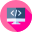 **TODO!**

Insérez-y directement la liste des pokemons (représentés chacun par un dictionnaire -- l'orientation `records`).

💡 Astuces :
- n'oubliez pas de récupérer le résultat de l'insertion


In [8]:
# code moi steupléé 🥺

# insertion de la liste de dictionnaires dans la collection
res = pokemons_coll.insert_many(pokemons)

# affichage de la lise des collections de la basse de données
print(but3db.list_collection_names())

# Affichage du résultat de l'insertion
print(res)

['pokemons']
InsertManyResult([ObjectId('68dbdeb424884a74f31439fb'), ObjectId('68dbdeb424884a74f31439fc'), ObjectId('68dbdeb424884a74f31439fd'), ObjectId('68dbdeb424884a74f31439fe'), ObjectId('68dbdeb424884a74f31439ff'), ObjectId('68dbdeb424884a74f3143a00'), ObjectId('68dbdeb424884a74f3143a01'), ObjectId('68dbdeb424884a74f3143a02'), ObjectId('68dbdeb424884a74f3143a03'), ObjectId('68dbdeb424884a74f3143a04'), ObjectId('68dbdeb424884a74f3143a05'), ObjectId('68dbdeb424884a74f3143a06'), ObjectId('68dbdeb424884a74f3143a07'), ObjectId('68dbdeb424884a74f3143a08'), ObjectId('68dbdeb424884a74f3143a09'), ObjectId('68dbdeb424884a74f3143a0a'), ObjectId('68dbdeb424884a74f3143a0b'), ObjectId('68dbdeb424884a74f3143a0c'), ObjectId('68dbdeb424884a74f3143a0d'), ObjectId('68dbdeb424884a74f3143a0e'), ObjectId('68dbdeb424884a74f3143a0f'), ObjectId('68dbdeb424884a74f3143a10'), ObjectId('68dbdeb424884a74f3143a11'), ObjectId('68dbdeb424884a74f3143a12'), ObjectId('68dbdeb424884a74f3143a13'), ObjectId('68dbdeb42

In [6]:
# la récupération d'un élément dans une collection donne un cursor (un itérable)
print(pokemons_coll.find())

# comme vous le voyez, il s'agit d'un Cursor, une sorte de pointeur sur l'objet et son emplacement

#### 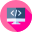 **TODO!**

Affichons le cursor sous forme de liste issue de la collection. Désormais, les éléments ont un _id qui est un objet instancié (qui peut être mis mauellement lors de l'insertion), donc pas serializable dans un JSON normal 😉

💡 Astuces :
- la méthode `.to_list()` peut être pratique

In [ ]:
# code moi steupléé 🥺

# nous utilisons la méthode .find() de l'instance collection. Puis nous transformons le Cursor en liste avec la méthode .to_list()
print(pokemons_coll.find().to_list())

[{'_id': ObjectId('674453db1d95d26fbdfaa9c0'), 'Number': 1, 'Name': 'Bulbasaur', 'Type_1': 'Grass', 'Type_2': 'Poison', 'Total': 318, 'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp_Atk': 65, 'Sp_Def': 65, 'Speed': 45, 'Generation': 1, 'isLegendary': False, 'Color': 'Green', 'hasGender': True, 'Pr_Male': 0.875, 'Egg_Group_1': 'Monster', 'Egg_Group_2': 'Grass', 'hasMegaEvolution': False, 'Height_m': 0.71, 'Weight_kg': 6.9, 'Catch_Rate': 45, 'Body_Style': 'quadruped'}, {'_id': ObjectId('674453db1d95d26fbdfaa9c1'), 'Number': 2, 'Name': 'Ivysaur', 'Type_1': 'Grass', 'Type_2': 'Poison', 'Total': 405, 'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp_Atk': 80, 'Sp_Def': 80, 'Speed': 60, 'Generation': 1, 'isLegendary': False, 'Color': 'Green', 'hasGender': True, 'Pr_Male': 0.875, 'Egg_Group_1': 'Monster', 'Egg_Group_2': 'Grass', 'hasMegaEvolution': False, 'Height_m': 0.99, 'Weight_kg': 13.0, 'Catch_Rate': 45, 'Body_Style': 'quadruped'}, {'_id': ObjectId('674453db1d95d26fbdfaa9c2'), 'Number': 3, 'Name': '

#### 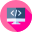 **TODO!**

Affichez le premier élément

In [ ]:
# code moi steupléé 🥺

# la méthode ._find_one() permet de récupérer un seul élément (donc le type de retour est Dict)
print(pokemons_coll.find_one())

{'_id': ObjectId('674453db1d95d26fbdfaa9c0'), 'Number': 1, 'Name': 'Bulbasaur', 'Type_1': 'Grass', 'Type_2': 'Poison', 'Total': 318, 'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp_Atk': 65, 'Sp_Def': 65, 'Speed': 45, 'Generation': 1, 'isLegendary': False, 'Color': 'Green', 'hasGender': True, 'Pr_Male': 0.875, 'Egg_Group_1': 'Monster', 'Egg_Group_2': 'Grass', 'hasMegaEvolution': False, 'Height_m': 0.71, 'Weight_kg': 6.9, 'Catch_Rate': 45, 'Body_Style': 'quadruped'}


#### 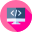 **TODO!**

Affichez l'identifiant du premier élément de la collection.

Qu'est-ce que cet identifiant ? De quel type est-il ?

In [ ]:
# code moi steupléé 🥺

print(pokemons_coll.find_one()["_id"])

# si vous affichez le type (avec type(element) ) vous verrez qu'il s'agit d'un type ObjectId(), et donc d'une instance de la classe ObjectId()

674453db1d95d26fbdfaa9c0


#### 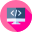 **TODO!**

Affichez le numéro du pokémon le plus mignon de l'univers.... carapuce !

<img height="100px" src="https://www.pokepedia.fr/images/thumb/c/cc/Carapuce-RFVF.png/800px-Carapuce-RFVF.png">

💡Astuce :
- `find_one()` et `find()` acceptent des arguments 😉

In [ ]:
# code moi steupléé 🥺

# find_one() prend deux arguments.
# le premier correspond aux conditions de filtres (i.e. l'équivalent du WHERE dans SQL). 
# Le second correspond à ce que l'on veut récupérer comme attribut (i.e. l'équivalent de SELECT en SQL)
print(pokemons_coll.find_one({"Name": "Squirtle"})["Number"])

# donc nous aurions également pu faire ceci
# pokemons_coll.find_one({"Name":"Squirtle"}, {"Number": 1})

7


#### 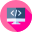 **TODO!**

Affichez désormais uniquement les noms des pokemons avec leur premier type, un par ligne, en excluant l'id

In [ ]:
# code moi steupléé 🥺

# Nous utilisons une list comprehension ; voir ici si vous ne connaissez pas : https://www.w3schools.com/python/python_lists_comprehension.asp

# 1 signifie True, 0 signifie False
res = [pokemon for pokemon in pokemons_coll.find({}, {"_id": 0, "Name": 1, "Type_1": 1})]
for r in res: print(r)
print(len(res))

{'Name': 'Bulbasaur', 'Type_1': 'Grass'}
{'Name': 'Ivysaur', 'Type_1': 'Grass'}
{'Name': 'Venusaur', 'Type_1': 'Grass'}
{'Name': 'Charmander', 'Type_1': 'Fire'}
{'Name': 'Charmeleon', 'Type_1': 'Fire'}
{'Name': 'Charizard', 'Type_1': 'Fire'}
{'Name': 'Squirtle', 'Type_1': 'Water'}
{'Name': 'Wartortle', 'Type_1': 'Water'}
{'Name': 'Blastoise', 'Type_1': 'Water'}
{'Name': 'Caterpie', 'Type_1': 'Bug'}
{'Name': 'Metapod', 'Type_1': 'Bug'}
{'Name': 'Butterfree', 'Type_1': 'Bug'}
{'Name': 'Weedle', 'Type_1': 'Bug'}
{'Name': 'Kakuna', 'Type_1': 'Bug'}
{'Name': 'Beedrill', 'Type_1': 'Bug'}
{'Name': 'Pidgey', 'Type_1': 'Normal'}
{'Name': 'Pidgeotto', 'Type_1': 'Normal'}
{'Name': 'Pidgeot', 'Type_1': 'Normal'}
{'Name': 'Rattata', 'Type_1': 'Normal'}
{'Name': 'Raticate', 'Type_1': 'Normal'}
{'Name': 'Spearow', 'Type_1': 'Normal'}
{'Name': 'Fearow', 'Type_1': 'Normal'}
{'Name': 'Ekans', 'Type_1': 'Poison'}
{'Name': 'Arbok', 'Type_1': 'Poison'}
{'Name': 'Pikachu', 'Type_1': 'Electric'}
{'Name': 'Ra

#### 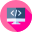 **TODO!**

Combien de pokemons ont un nom commençant par A ?

💡 Astuces :
- vive les expressions régulières

In [ ]:
# code moi steupléé 🥺

# version optimisée (car on ne récupère pas tous les docs, juste le nombre directement issu de la BDD)
# équivalent (à peu près) d'un SELECT count(*) FROM pokemons_coll WHERE name startswith("a")
pokemons_coll.count_documents({"Name": {"$regex": "^A" }})

33

#### 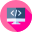 **TODO!**

Afficher le nom des pokemons ayant un nom commençant par A et affichez les séparés par une barre verticale. 

Puis, triez les par ordre alphabétique avec python et affichez-les.

Enfin, triez les par ordre alphabétique de nouveau mais à l'aide de mongodb (donc directement lors de la requête).

💡 Astuces :
- vous pourriez avoir besoin de `list comprehension` et autres astuces pratiques de python

In [16]:
# afficher le nom des pokemons ayant un nom commençant par A

# code moi steupléé 🥺
res = [pokemon["Name"] for pokemon in pokemons_coll.find({"Name": {"$regex": "^A"}}, {"_id": 0, "Name": 1}) ]
print(" | ".join(res))

# les trier par ordre alphabétique avec python et les afficher
# code moi steupléé 🥺
print(" | ".join(sorted(res)))

# les trier par ordre alphabétique avec mongodb (donc directement lors de la requête)
# code moi steupléé 🥺
res = [pokemon["Name"] for pokemon in pokemons_coll.find({"Name": {"$regex": "^A"}}, {"_id": 0, "Name": 1}, sort={"Name": 1})]
print(" | ".join(res))

Arbok | Arcanine | Abra | Alakazam | Aerodactyl | Articuno | Ariados | Ampharos | Azumarill | Aipom | Azurill | Aron | Aggron | Altaria | Anorith | Armaldo | Absol | Ambipom | Abomasnow | Azelf | Arceus | Audino | Archen | Archeops | Amoonguss | Alomomola | Axew | Accelgor | Aegislash | Aromatisse | Amaura | Aurorus | Avalugg
Abomasnow | Abra | Absol | Accelgor | Aegislash | Aerodactyl | Aggron | Aipom | Alakazam | Alomomola | Altaria | Amaura | Ambipom | Amoonguss | Ampharos | Anorith | Arbok | Arcanine | Arceus | Archen | Archeops | Ariados | Armaldo | Aromatisse | Aron | Articuno | Audino | Aurorus | Avalugg | Axew | Azelf | Azumarill | Azurill
Abomasnow | Abra | Absol | Accelgor | Aegislash | Aerodactyl | Aggron | Aipom | Alakazam | Alomomola | Altaria | Amaura | Ambipom | Amoonguss | Ampharos | Anorith | Arbok | Arcanine | Arceus | Archen | Archeops | Ariados | Armaldo | Aromatisse | Aron | Articuno | Audino | Aurorus | Avalugg | Axew | Azelf | Azumarill | Azurill


#### 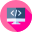 **TODO!**

Affichez un dict pour représenter les données par type principal du pokemon, puis créez une collection par type

In [ ]:
import math

# code moi steupléé 🥺

# récupérons l'ensemble des groupes possibles
def check_not_nan(element):
    """convenient function to apply our filtering logic"""
    if not isinstance(element, str):
        if not math.isnan(element):
            return True
        else:
            return False
    return True

def find_type1(groupe):
    return pokemons_coll.find({"Type_1": groupe})

# list(set([])) est une manière simple d'enlever les redondances d'une liste
types1 = set( pokemon["Type_1"] for pokemon in pokemons_coll.find({}, {"_id": 0, "Type_1": 1}) if check_not_nan(pokemon["Type_1"]) )
types1 = sorted(list(types1))

# equivalent à ces lignes
# pokes = pokemons_coll.find({}, {"_id":0, "Type_1":1})
# types = list()
# for pokemon in pokes:
#     if check_not_nan(pokemon["Type_1"]):
#         types.append(pokemon["Type_1"])
# list(set(types))

for type in types1:
    type_coll = but3db[type]
    ids_inserted = type_coll.insert_many(find_type1(type))
    print(f"{ids_inserted} were inserted successfully~")

print("collections disponibles : \n%s" % (but3db.list_collection_names()))

InsertManyResult([ObjectId('674453db1d95d26fbdfaa9c9'), ObjectId('674453db1d95d26fbdfaa9ca'), ObjectId('674453db1d95d26fbdfaa9cb'), ObjectId('674453db1d95d26fbdfaa9cc'), ObjectId('674453db1d95d26fbdfaa9cd'), ObjectId('674453db1d95d26fbdfaa9ce'), ObjectId('674453db1d95d26fbdfaa9ed'), ObjectId('674453db1d95d26fbdfaa9ee'), ObjectId('674453db1d95d26fbdfaa9ef'), ObjectId('674453db1d95d26fbdfaa9f0'), ObjectId('674453db1d95d26fbdfaaa3a'), ObjectId('674453db1d95d26fbdfaaa3e'), ObjectId('674453db1d95d26fbdfaaa64'), ObjectId('674453db1d95d26fbdfaaa65'), ObjectId('674453db1d95d26fbdfaaa66'), ObjectId('674453db1d95d26fbdfaaa67'), ObjectId('674453db1d95d26fbdfaaa80'), ObjectId('674453db1d95d26fbdfaaa8b'), ObjectId('674453db1d95d26fbdfaaa8c'), ObjectId('674453db1d95d26fbdfaaa93'), ObjectId('674453db1d95d26fbdfaaa94'), ObjectId('674453db1d95d26fbdfaaa95'), ObjectId('674453db1d95d26fbdfaaac8'), ObjectId('674453db1d95d26fbdfaaac9'), ObjectId('674453db1d95d26fbdfaaaca'), ObjectId('674453db1d95d26fbdfaaa

#### 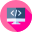 **TODO!**

Supprimez les informations du pokemon de votre choix, puis supprimez un pokemon au hasard

In [18]:
# code moi steupléé 🥺

# j'en prends un aléatoire ;)

pipeline = [{"$sample":{"size":1}}]
res = pokemons_coll.aggregate(pipeline)
res = res.to_list()
print(res)

pokemon_au_hasard = res[0]

res = pokemons_coll.find_one_and_delete({"_id": pokemon_au_hasard["_id"]})

print(res)

[{'_id': ObjectId('674453db1d95d26fbdfaac07'), 'Number': 584, 'Name': 'Vanilluxe', 'Type_1': 'Ice', 'Type_2': None, 'Total': 535, 'HP': 71, 'Attack': 95, 'Defense': 85, 'Sp_Atk': 110, 'Sp_Def': 95, 'Speed': 79, 'Generation': 5, 'isLegendary': False, 'Color': 'White', 'hasGender': True, 'Pr_Male': 0.5, 'Egg_Group_1': 'Mineral', 'Egg_Group_2': None, 'hasMegaEvolution': False, 'Height_m': 1.3, 'Weight_kg': 57.5, 'Catch_Rate': 45, 'Body_Style': 'multiple_bodies'}]
{'_id': ObjectId('674453db1d95d26fbdfaac07'), 'Number': 584, 'Name': 'Vanilluxe', 'Type_1': 'Ice', 'Type_2': None, 'Total': 535, 'HP': 71, 'Attack': 95, 'Defense': 85, 'Sp_Atk': 110, 'Sp_Def': 95, 'Speed': 79, 'Generation': 5, 'isLegendary': False, 'Color': 'White', 'hasGender': True, 'Pr_Male': 0.5, 'Egg_Group_1': 'Mineral', 'Egg_Group_2': None, 'hasMegaEvolution': False, 'Height_m': 1.3, 'Weight_kg': 57.5, 'Catch_Rate': 45, 'Body_Style': 'multiple_bodies'}


#### 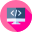 **TODO!**

Affichez les noms de chaque type1, séparés par un espace, à partir des collections de type1

In [ ]:
# code moi steupléé 🥺

collections = sorted([col for col in but3db.list_collection_names() if col != 'pokemons'])

for coll in collections:
    type_coll = but3db[coll]
    type_pokemons = type_coll.find({}, {"_id": 0, "Name": 1}).sort("Name", pymongo.ASCENDING).to_list()
    type_pokemons = [e["Name"] for e in type_pokemons]
    print(coll, ", ".join(type_pokemons), sep=" => ")

# Vous devriez malgré tout voir des redondances dans entre les collections dédiées aux types. C'est normal ! Ce n'est pas de l'ACID, pas d'atomicité (le A de ACID)


Bug => Accelgor, Ariados, Beautifly, Beedrill, Burmy, Butterfree, Cascoon, Caterpie, Combee, Crustle, Durant, Dustox, Dwebble, Escavalier, Forretress, Galvantula, Genesect, Heracross, Illumise, Joltik, Kakuna, Karrablast, Kricketot, Kricketune, Larvesta, Leavanny, Ledian, Ledyba, Masquerain, Metapod, Mothim, Nincada, Ninjask, Paras, Parasect, Pineco, Pinsir, Scatterbug, Scizor, Scolipede, Scyther, Sewaddle, Shedinja, Shelmet, Shuckle, Silcoon, Spewpa, Spinarak, Surskit, Swadloon, Venipede, Venomoth, Venonat, Vespiquen, Vivillon, Volbeat, Volcarona, Weedle, Whirlipede, Wormadam, Wurmple, Yanma, Yanmega
Dark => Absol, Bisharp, Darkrai, Deino, Honchkrow, Houndoom, Houndour, Hydreigon, Inkay, Liepard, Malamar, Mandibuzz, Mightyena, Murkrow, Pawniard, Poochyena, Purrloin, Sableye, Scrafty, Scraggy, Sneasel, Umbreon, Vullaby, Weavile, Yveltal, Zoroark, Zorua, Zweilous
Dragon => Altaria, Axew, Bagon, Dragonair, Dragonite, Dratini, Druddigon, Fraxure, Gabite, Garchomp, Gible, Goodra, Goomy, Ha

Et voilà~ ! Vous avez appris à utiliser MongoDB pour les opérations basiques :
- Create
- Read
- Update
- Delete

donc le CRUD 😃